In [1]:
import numpy as np
from matplotlib import pyplot as plt
from triqs.gf import *
from triqs.operators import *
from triqs.atom_diag import *
from triqs.plot.mpl_interface import oplot

In [2]:
eta=0.1   # broadening parameter as in (omega+i*eta)
a = 1     # The lattice constant a

def hybridization(omega, mu, epsilon_k_array, t_k_array):
    # Full expression of the hybridization
    # given itinerant electron energies epsilon_k_array
    # and hopping parameters t_k_array
    return (a/(2*np.pi))*((2*np.pi/a)/len(t_k_array))*np.sum((t_k_array**2/(omega+1j*eta - epsilon_k_array+ mu)))

## Hybridization with a one-dimensional bath

In [3]:
# k mesh from -pi/a to pi/a
n_k = 5000
k_array = np.pi/a*np.linspace(-1,1,n_k)

# The 1D chain has the dispersion -2*t*cos(k). Assume t=1
mu=0
epsilon_k_array = -2*np.cos(k_array) - mu

# Assume that the hopping between the local impurity and the 
# itinerant electrons is momentum_independent, i.e. t_k is a constant in k
t_k=1.0
t_k_array = t_k*np.ones(n_k)

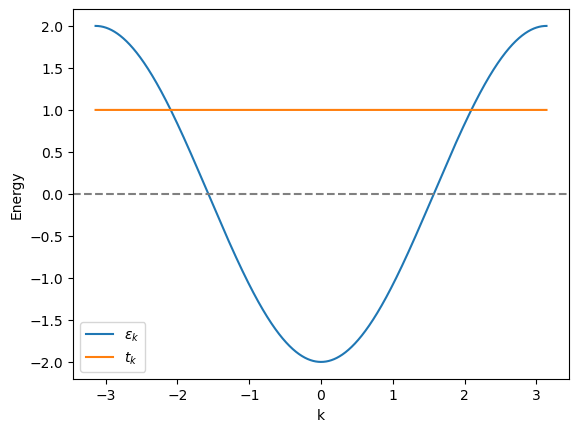

In [4]:
plt.plot(k_array, epsilon_k_array, label='$\\epsilon_k$')
plt.plot(k_array, t_k_array, label='$t_k$')
plt.xlabel('k')
plt.ylabel('Energy')
plt.legend()
plt.axhline(0, color='gray', linestyle='dashed')

Text(0, 0.5, 'Hybridization, $\\Sigma^R(\\omega)$')

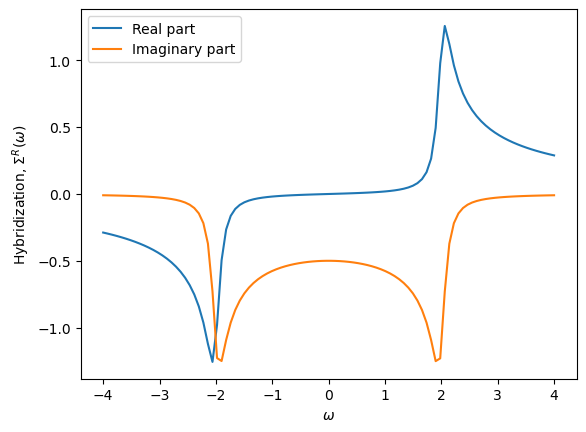

In [5]:
omega_array=np.linspace(-4,4,100) # Define the omega_mesh
hybridization_array=np.array([hybridization(omega, mu, epsilon_k_array, t_k_array) for omega in omega_array])

plt.plot(omega_array, hybridization_array.real, label= 'Real part')
plt.plot(omega_array, hybridization_array.imag, label= 'Imaginary part')
plt.legend()
plt.xlabel('$\\omega$')
plt.ylabel('Hybridization, $\\Sigma^R(\omega)$')

In [6]:
hybridization_array[50]

(0.00040157114885300873-0.49938238759600356j)

### Question

Does the shape of the imaginary part remind you of anything? Play with the parameters in the cells above. How does the hybridization function change with the strength of the hopping $t_k$?

## Flat hybridization

In [12]:
def flat_hybridization(omega, mu):
    W = 2
    energies=np.linspace(-W,W,1000)
    de = 2*W/1000

    ret = 0
    for ee in energies:
        ret+=(de/(2*W))*t_k**2/(omega + 1j*eta - ee + mu)
        
    return ret

Text(0, 0.5, 'Hybridization, $\\Sigma^R(\\omega)$')

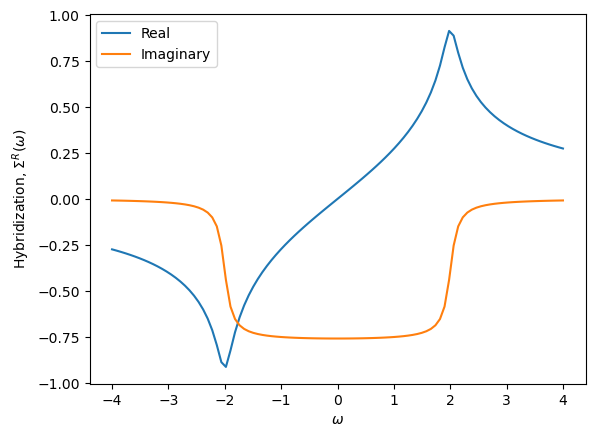

In [13]:
omega_array=np.linspace(-4,4,100)
hybridization_array=np.array([flat_hybridization(omega, mu) for omega in omega_array])
plt.plot(omega_array, hybridization_array.real, label='Real')
plt.plot(omega_array, hybridization_array.imag, label='Imaginary')
plt.legend()
plt.xlabel('$\\omega$')
plt.ylabel('Hybridization, $\\Sigma^R(\omega)$')

### Question

Use the full hybridization expression with a linear dispersion for the 1D chain (epsilon_k_array = (4/np.pi*a)*np.abs(k_array) - 2 - mu). What do you find?

## Analytic consinuation -> Hybridization on the Matsubara axis

The Hybridization function can also be analytically continued to the Matsubara axis.
Use the cells below to plot the hybridization function on the Matsubara axis at different temperatures.

In [14]:
beta = 1
iomega_array = 1j*np.pi*(2*np.arange(-30,30)+1)/(beta)

### Full hybridization of the 1D chain

Text(0, 0.5, 'Hybridization, $\\Sigma^R(i\\omega_n)$')

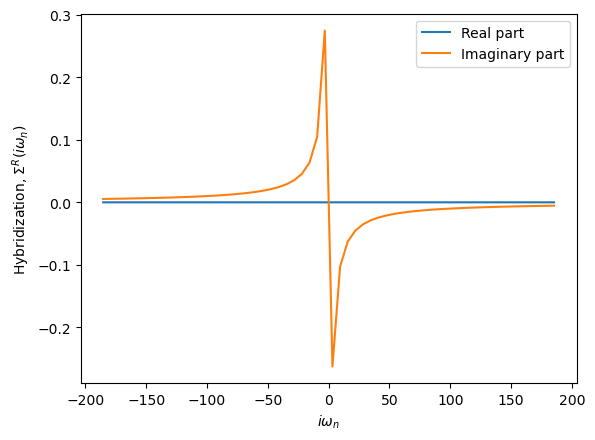

In [15]:
hybridization_array=np.array([hybridization(iomega, mu, epsilon_k_array, t_k_array) for iomega in iomega_array])

plt.plot(iomega_array.imag, hybridization_array.real, label= 'Real part')
plt.plot(iomega_array.imag, hybridization_array.imag, label= 'Imaginary part')
plt.legend()
plt.xlabel('$i\\omega_n$')
plt.ylabel('Hybridization, $\\Sigma^R(i\omega_n)$')

### Flat hybridization

Text(0, 0.5, 'Hybridization, $\\Sigma^R(i\\omega_n)$')

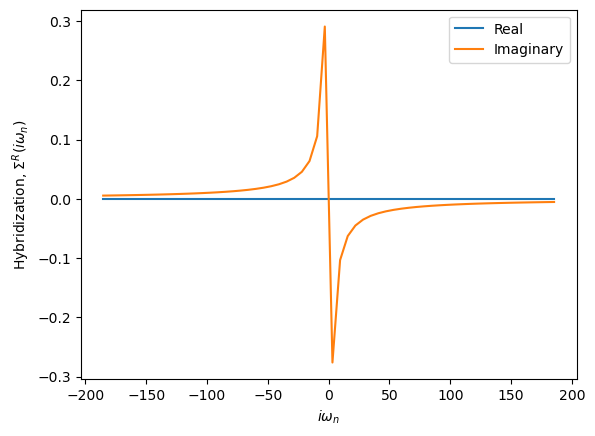

In [16]:
hybridization_array=np.array([flat_hybridization(iomega, mu) for iomega in iomega_array])
plt.plot(iomega_array.imag, hybridization_array.real, label='Real')
plt.plot(iomega_array.imag, hybridization_array.imag, label='Imaginary')
plt.legend()
plt.xlabel('$i\\omega_n$')
plt.ylabel('Hybridization, $\\Sigma^R(i\omega_n)$')